In [17]:
import requests
import json
import pprint as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [18]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CXUTOTALEXPLB0402M','CXUTOTALEXPLB0403M','CXUTOTALEXPLB0404M',
                'CXUTOTALEXPLB0405M','CXUTOTALEXPLB0406M','CXUTOTALEXPLB0408M','CXUTOTALEXPLB0409M',
                'CXUENTRTAINLB0402M','CXUENTRTAINLB0403M','CXUENTRTAINLB0404M',
                'CXUENTRTAINLB0405M','CXUENTRTAINLB0406M',
                'CXUENTRTAINLB0408M','CXUENTRTAINLB0409M',
                'CXUFEESADMLB0402M','CXUFEESADMLB0403M','CXUFEESADMLB0404M',
                'CXUFEESADMLB0405M','CXUFEESADMLB0406M','CXUFEESADMLB0408M','CXUFEESADMLB0409M',
                'CXUTVAUDIOLB0402M','CXUTVAUDIOLB0403M',
                'CXUTVAUDIOLB0404M', 'CXUTVAUDIOLB0405M','CXUTVAUDIOLB0406M','CXUTVAUDIOLB0408M','CXUTVAUDIOLB0409M',
                'CXUPETSLB0402M','CXUPETSLB0403M','CXUPETSLB0404M',
                'CXUPETSLB0405M','CXUPETSLB0406M','CXUPETSLB0408M','CXUPETSLB0409M',
                'CXUTOYSLB0402M','CXUTOYSLB0403M','CXUTOYSLB0404M',
                'CXUTOYSLB0405M','CXUTOYSLB0406M','CXUTOYSLB0408M','CXUTOYSLB0409M',
                'CXUENTEROTHLB0402M','CXUENTEROTHLB0403M','CXUENTEROTHLB0404M',
                'CXUENTEROTHLB0405M','CXUENTEROTHLB0406M','CXUENTEROTHLB0408M','CXUENTEROTHLB0409M',
                'CXUINCAFTAXLB0402M','CXUINCAFTAXLB0403M','CXUINCAFTAXLB0404M',
                'CXUINCAFTAXLB0405M','CXUINCAFTAXLB0406M','CXUINCAFTAXLB0408M','CXUINCAFTAXLB0409M'
                               ],
                   "startyear":"2017", 
                   "endyear":"2017",
                   "catalog":True, 
                   "calculations":True, 
                   "annualaverage":True,
            "registrationkey":"a3f26c081d1546a58b1461108c6f62f9"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)

json_data = json.loads(p.text)

pp.PrettyPrinter(indent=2)
output = open("CXENTERTAIN" + '.json','w')
pp.pprint(json_data, stream=output)
output.close()


In [19]:
list1 = []
tlist1 = []
tlist2 = []


if json_data['status'] == "REQUEST_SUCCEEDED":
    for series in json_data['Results']['series']:
        seriesId = series['seriesID']
#         print(series['catalog']['item'])
        series_title = series['catalog']['series_title']
        titleList = series_title.split('by Age:', 1)
        tlist1.append(titleList[0])
        tlist2.append(titleList[1])
        #print(series_title)
        for item in series['data']:
            
            year = item['year']
            period = item['period']
            value = int(item['value'])
            list1.append(value)
            dict1 = {''}
        #print("Year:" + year + " Value:" + value)

else:
    print(json_data['status'])


    

In [20]:
df = pd.DataFrame(np.column_stack([list1, tlist1, tlist2]), 
                               columns=['value', 'Category', 'Age'])
df.value = pd.to_numeric(df.value, errors='coerce')



In [21]:

lf = df.pivot(index='Age', columns='Category', values='value')
lf
#must rename indices/cols
#rename indices
lf.index
lf = lf.rename(index={' Reference person between age 25 and 34': '25 to 34',
                    ' Reference person between age 35 and 44': '35 to 44',
                    ' Reference person between age 45 and 54': '45 to 54',
                    ' Reference person between age 55 and 64': '55 to 64',
                    ' Reference person between age 45 and 54': '45 to 54',
                    ' Reference person between age 65 and 74': '65 to 74',
                    ' Reference person under age 25': 'Under 25',
                    ' Reference person over the age of 75': 'Over 75'})
lf

Category,Audio and visual equipment and services,Entertainment,Entertainment: fees and admissions,"Entertainment: other supplies, equip., & services",Income after taxes,Pets,Total average annual expenditures,"Toys, hobbies, and playground equipment"
Age,,,,,,,,
25 to 34,826.0,2644.0,619.0,569.0,NaN,453.0,55325.0,178.0
35 to 44,1031.0,4001.0,1090.0,779.0,NaN,853.0,69034.0,248.0
45 to 54,1161.0,4064.0,1056.0,695.0,NaN,981.0,73905.0,171.0
55 to 64,1093.0,3444.0,655.0,650.0,NaN,907.0,64972.0,139.0
65 to 74,1067.0,3327.0,683.0,723.0,NaN,714.0,54997.0,141.0
Over 75,794.0,1657.0,388.0,116.0,NaN,312.0,41849.0,46.0
Under 25,542.0,1488.0,333.0,249.0,29960.0,239.0,33629.0,124.0


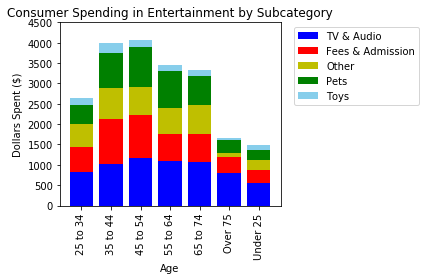

In [22]:
#Could make pie charts for each race and the percent of entertainment spending by category
xlabels = lf.index
xl = np.arange(len(xlabels))
#print(t_df

audio = lf['Audio and visual equipment and services ']
fees = lf['Entertainment: fees and admissions ']
other = lf['Entertainment: other supplies, equip., & services ']
pets = lf['Pets ']
toys = lf['Toys, hobbies, and playground equipment ']

p1 = plt.bar(xlabels, audio, align='center', color ='b', label='TV & Audio')

p2 = plt.bar(xlabels, fees, align='center', color ='r', bottom=audio, label='Fees & Admission')
p3 = plt.bar(xlabels, other, align='center', color ='y', bottom=[i+j for i,j in zip(audio, fees)], label='Other')
p4 = plt.bar(xlabels, pets, align='center', color ='g', bottom=[i+j+k for i,j,k in zip(audio, fees, other)], label='Pets')
p5 = plt.bar(xlabels, toys, align='center', color ='skyblue', bottom=[i+j+k+l for i,j,k,l in zip(audio, fees, other, pets)],label='Toys')

#stack plots
plt.ylim(0, 4500)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Consumer Spending in Entertainment by Subcategory')
plt.xlabel('Age')
plt.ylabel('Dollars Spent ($)')
plt.tight_layout()
plt.savefig("Spending_Age.png")
plt.show()

In [23]:
#Pie Chart
subcategories = ["TV & Audio", "Fees & Admission", "Other", "Pets", "Toys"]
votes = [826, 619, 569, 453, 178]
colors = ["yellow","green","lightblue","orange","red"]
explode = (0.1,0,0,0,0)

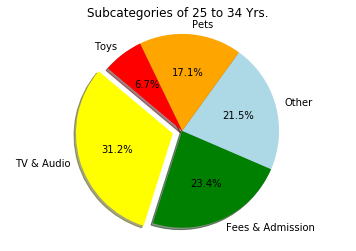

In [24]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(votes, explode=explode, labels=subcategories, colors=colors,
    autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.title("Subcategories of 25 to 34 Yrs.")
plt.savefig("Subcategories_Age.png")

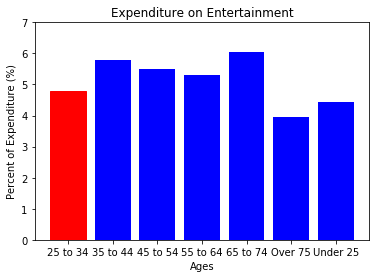

In [25]:
#Experiment
total_ent = lf['Entertainment ']
expenditures = lf['Total average annual expenditures ']
spent = (total_ent/expenditures) * 100
bars = plt.bar(xlabels, spent, color="b", align="center")
bars[0].set_color('r')
plt.xlim(-0.75, len(xlabels)-0.25)
plt.ylim(0, 7)
plt.title("Expenditure on Entertainment")
plt.xlabel("Ages")
plt.ylabel("Percent of Expenditure (%)")
plt.savefig("ExpEnt_Age.png")

In [26]:
spent

Age
25 to 34    4.779033
35 to 44    5.795695
45 to 54    5.498951
55 to 64    5.300745
65 to 74    6.049421
Over 75     3.959473
Under 25    4.424752
dtype: float64